Choose a labeled dataset that has only two label categories. Link to the dataset. Then, prepare the data for modeling with logistic regression. Think about what this means and what you will need to do. 

 - Using that data, perform both Logistic regression classification AND multinomial naïve Bayes classification. Compare and discuss the results and include the confusion matrices and accuracies. Link to the code

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.naive_bayes import MultinomialNB

In [40]:
#Make a pretty confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    

In [2]:
df = pd.read_csv("CropEffandEmLabels.csv", index_col = 0)
df2 = pd.read_csv("SA_fires.csv")

In [3]:
df2.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GI,Emissions from Fires,32,Argentina,7225,Emissions (CH4),6796,Humid tropical forest,1990,1990,3050,FAO TIER 1,kt,14.7153,E,Estimated value,NaN
1,GI,Emissions from Fires,32,Argentina,7230,Emissions (N2O),6796,Humid tropical forest,1990,1990,3050,FAO TIER 1,kt,0.7852,E,Estimated value,NaN
2,GI,Emissions from Fires,32,Argentina,7225,Emissions (CH4),6796,Humid tropical forest,1991,1991,3050,FAO TIER 1,kt,14.7153,E,Estimated value,NaN
3,GI,Emissions from Fires,32,Argentina,7230,Emissions (N2O),6796,Humid tropical forest,1991,1991,3050,FAO TIER 1,kt,0.7852,E,Estimated value,NaN
4,GI,Emissions from Fires,32,Argentina,7225,Emissions (CH4),6796,Humid tropical forest,1992,1992,3050,FAO TIER 1,kt,14.7153,E,Estimated value,NaN


In [4]:
df2.Item.value_counts()

Other forest              1276
Humid tropical forest     1255
Closed shrubland           990
Grassland                  990
Open shrubland             990
Savanna                    990
Woody savanna              990
Fires in organic soils     990
Name: Item, dtype: int64

In [5]:
df2 = df2.loc[df2["Element"] == "Emissions (CH4)"]
df2 = df2.loc[df2["Area"] != "South America"]
df2

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GI,Emissions from Fires,32,Argentina,7225,Emissions (CH4),6796,Humid tropical forest,1990,1990,3050,FAO TIER 1,kt,14.7153,E,Estimated value,NaN
2,GI,Emissions from Fires,32,Argentina,7225,Emissions (CH4),6796,Humid tropical forest,1991,1991,3050,FAO TIER 1,kt,14.7153,E,Estimated value,NaN
4,GI,Emissions from Fires,32,Argentina,7225,Emissions (CH4),6796,Humid tropical forest,1992,1992,3050,FAO TIER 1,kt,14.7153,E,Estimated value,NaN
6,GI,Emissions from Fires,32,Argentina,7225,Emissions (CH4),6796,Humid tropical forest,1993,1993,3050,FAO TIER 1,kt,14.7153,E,Estimated value,NaN
8,GI,Emissions from Fires,32,Argentina,7225,Emissions (CH4),6796,Humid tropical forest,1994,1994,3050,FAO TIER 1,kt,14.7153,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,GI,Emissions from Fires,862,Venezuela (Bolivarian Republic of),7225,Emissions (CH4),6993,Fires in organic soils,2018,2018,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN
7891,GI,Emissions from Fires,862,Venezuela (Bolivarian Republic of),7225,Emissions (CH4),6993,Fires in organic soils,2019,2019,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN
7893,GI,Emissions from Fires,862,Venezuela (Bolivarian Republic of),7225,Emissions (CH4),6993,Fires in organic soils,2020,2020,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN
7895,GI,Emissions from Fires,862,Venezuela (Bolivarian Republic of),7225,Emissions (CH4),6993,Fires in organic soils,2021,2021,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN


In [6]:
df2.Item.value_counts()

Humid tropical forest     462
Other forest              462
Closed shrubland          462
Grassland                 462
Open shrubland            462
Savanna                   462
Woody savanna             462
Fires in organic soils    462
Name: Item, dtype: int64

In [7]:
df3 = pd.read_csv("SA_land_area.csv")
df3


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,32,Argentina,5110,Area,6601,Land area,1961,1961,1000 ha,273669.0,A,Official figure,NaN
1,RL,Land Use,32,Argentina,5110,Area,6601,Land area,1962,1962,1000 ha,273669.0,A,Official figure,NaN
2,RL,Land Use,32,Argentina,5110,Area,6601,Land area,1963,1963,1000 ha,273669.0,A,Official figure,NaN
3,RL,Land Use,32,Argentina,5110,Area,6601,Land area,1964,1964,1000 ha,273669.0,A,Official figure,NaN
4,RL,Land Use,32,Argentina,5110,Area,6601,Land area,1965,1965,1000 ha,273669.0,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,RL,Land Use,862,Venezuela (Bolivarian Republic of),5110,Area,6601,Land area,2018,2018,1000 ha,88205.0,I,Imputed value,NaN
864,RL,Land Use,862,Venezuela (Bolivarian Republic of),5110,Area,6601,Land area,2019,2019,1000 ha,88205.0,I,Imputed value,NaN
865,RL,Land Use,862,Venezuela (Bolivarian Republic of),5110,Area,6601,Land area,2020,2020,1000 ha,88205.0,I,Imputed value,NaN
866,RL,Land Use,862,Venezuela (Bolivarian Republic of),5110,Area,6601,Land area,2021,2021,1000 ha,88205.0,I,Imputed value,NaN


In [8]:
df3.Unit.value_counts()

1000 ha    868
Name: Unit, dtype: int64

In [9]:
fire_CH4_totals = df2.groupby(['Area', 'Year'])['Value'].sum().reset_index()
fire_CH4_totals = fire_CH4_totals.rename(columns ={"Value" : "CH4"})
fire_CH4_totals

,Area,Year,CH4
0,Argentina,1990,81.7615
1,Argentina,1991,81.7615
2,Argentina,1992,81.7615
3,Argentina,1993,81.7615
4,Argentina,1994,81.7615
...,...,...,...
457,Venezuela (Bolivarian Republic of),2018,44.7074
458,Venezuela (Bolivarian Republic of),2019,59.3990
459,Venezuela (Bolivarian Republic of),2020,74.9715
460,Venezuela (Bolivarian Republic of),2021,30.2724


In [10]:
CH4_area = pd.merge(fire_CH4_totals, df3, on = ['Area', 'Year'], how = "left")
print(len(CH4_area))
CH4_area.head()

462


,Area,Year,CH4,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code,Item,Year Code,Unit,Value,Flag,Flag Description,Note
0,Argentina,1990,81.7615,RL,Land Use,32,5110,Area,6601,Land area,1990,1000 ha,273669.0,A,Official figure,NaN
1,Argentina,1991,81.7615,RL,Land Use,32,5110,Area,6601,Land area,1991,1000 ha,273669.0,A,Official figure,NaN
2,Argentina,1992,81.7615,RL,Land Use,32,5110,Area,6601,Land area,1992,1000 ha,273669.0,A,Official figure,NaN
3,Argentina,1993,81.7615,RL,Land Use,32,5110,Area,6601,Land area,1993,1000 ha,273669.0,A,Official figure,NaN
4,Argentina,1994,81.7615,RL,Land Use,32,5110,Area,6601,Land area,1994,1000 ha,273669.0,A,Official figure,NaN


In [11]:
CH4_area.columns

Index(['Area', 'Year', 'CH4', 'Domain Code', 'Domain', 'Area Code (M49)',
       'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [12]:
CH4_area["CH4/Land Area"] = CH4_area["CH4"]/(CH4_area["Value"]/1000)
CH4_area = CH4_area.drop(columns = ['CH4', 'Domain Code', 'Domain', 'Area Code (M49)',
       'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'])
CH4_area

##Units are kt/ha

,Area,Year,CH4/Land Area
0,Argentina,1990,0.298761
1,Argentina,1991,0.298761
2,Argentina,1992,0.298761
3,Argentina,1993,0.298761
4,Argentina,1994,0.298761
...,...,...,...
457,Venezuela (Bolivarian Republic of),2018,0.506858
458,Venezuela (Bolivarian Republic of),2019,0.673420
459,Venezuela (Bolivarian Republic of),2020,0.849969
460,Venezuela (Bolivarian Republic of),2021,0.343205


In [13]:
df

,Area,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt),Efficiency (kt/cropland),Em_label,Eff_label,CL_label
0,Argentina,1961,0.9416,4.848952e+07,0.1747,5.149694e+04,Low,Mid,High
1,Argentina,1962,0.9544,4.860748e+07,0.1792,5.092989e+04,Low,Mid,High
2,Argentina,1963,0.9589,5.533947e+07,0.3471,5.771141e+04,Mid,Mid,High
3,Argentina,1964,0.9624,5.761074e+07,0.4164,5.986154e+04,Mid,Mid,High
4,Argentina,1965,0.9685,5.432264e+07,0.5205,5.608946e+04,Mid,Mid,High
...,...,...,...,...,...,...,...,...,...
862,South America,2017,0.3189,1.696150e+09,153.3090,5.318752e+06,High,High,Mid
863,South America,2018,0.3179,1.655944e+09,154.0408,5.209010e+06,High,High,Mid
864,South America,2019,0.3174,1.719963e+09,163.5284,5.418913e+06,High,High,Mid
865,South America,2020,0.3189,1.752409e+09,189.3039,5.495168e+06,High,High,Mid


In [14]:
merged = pd.merge(CH4_area, df, on = ['Area', 'Year'], how = "left")
print(len(merged))
merged = merged.dropna()
print(len(merged))
merged.head()

462
401


,Area,Year,CH4/Land Area,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt),Efficiency (kt/cropland),Em_label,Eff_label,CL_label
0,Argentina,1990,0.298761,0.8455,82969720.55,2.1113,98130.952750,Mid,Mid,High
1,Argentina,1991,0.298761,0.8367,90815919.46,1.9926,108540.599331,Mid,Mid,High
2,Argentina,1992,0.298761,0.8283,92193211.50,3.0524,111304.130750,Mid,Mid,High
3,Argentina,1993,0.298761,0.8202,88025431.59,3.4918,107321.911229,Mid,Mid,High
4,Argentina,1994,0.298761,0.8124,92850034.50,5.8675,114291.032127,High,Mid,High


In [15]:
merged.describe()

,Year,CH4/Land Area,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt),Efficiency (kt/cropland)
count,401.000000,401.000000,401.000000,4.010000e+02,401.000000,4.010000e+02
mean,2005.182045,0.399178,0.340254,9.668313e+07,7.902482,3.504670e+05
std,9.227637,0.636131,0.246852,2.404991e+08,17.615462,7.852411e+05
min,1990.000000,0.000435,0.074600,7.587498e+04,0.008300,7.205601e+02
25%,1997.000000,0.025913,0.127700,8.366722e+06,0.312300,1.671613e+04
50%,2005.000000,0.094336,0.246200,2.026413e+07,2.998300,9.932693e+04
75%,2013.000000,0.524729,0.560900,4.149519e+07,5.867500,2.061464e+05
max,2021.000000,4.959000,0.968300,1.269299e+09,139.514200,4.265117e+06


In [16]:
def cat_ch4(value):
    if value > 0.094336:
        return 'High'
    else:
        return "Low"


merged['CH4_label'] = merged['CH4/Land Area'].apply(cat_ch4)
merged

,Area,Year,CH4/Land Area,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt),Efficiency (kt/cropland),Em_label,Eff_label,CL_label,CH4_label
0,Argentina,1990,0.298761,0.8455,82969720.55,2.1113,98130.952750,Mid,Mid,High,High
1,Argentina,1991,0.298761,0.8367,90815919.46,1.9926,108540.599331,Mid,Mid,High,High
2,Argentina,1992,0.298761,0.8283,92193211.50,3.0524,111304.130750,Mid,Mid,High,High
3,Argentina,1993,0.298761,0.8202,88025431.59,3.4918,107321.911229,Mid,Mid,High,High
4,Argentina,1994,0.298761,0.8124,92850034.50,5.8675,114291.032127,High,Mid,High,High
...,...,...,...,...,...,...,...,...,...,...,...
456,Venezuela (Bolivarian Republic of),2017,0.334844,0.1080,17952661.86,4.6307,166228.350556,Mid,Mid,Low,High
457,Venezuela (Bolivarian Republic of),2018,0.506858,0.1106,16194418.02,2.9629,146423.309403,Mid,Mid,Low,High
458,Venezuela (Bolivarian Republic of),2019,0.673420,0.1139,15974778.03,2.3565,140252.660492,Mid,Mid,Low,High
459,Venezuela (Bolivarian Republic of),2020,0.849969,0.1158,17505937.25,2.3219,151173.896805,Mid,Mid,Low,High


In [17]:
merged.columns

Index(['Area', 'Year', 'CH4/Land Area', 'Cropland (ha/cap)',
       'Crop Prod Total (tonnes)', 'Fertilizer N20 Emissions (kt)',
       'Efficiency (kt/cropland)', 'Em_label', 'Eff_label', 'CL_label',
       'CH4_label'],
      dtype='object')

In [31]:
df_reg = merged[['Area', 'Year', 'Cropland (ha/cap)', 'Crop Prod Total (tonnes)',
       'Efficiency (kt/cropland)', 'Fertilizer N20 Emissions (kt)',
       'CH4_label']]
df_reg

,Area,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Efficiency (kt/cropland),Fertilizer N20 Emissions (kt),CH4_label
0,Argentina,1990,0.8455,82969720.55,98130.952750,2.1113,High
1,Argentina,1991,0.8367,90815919.46,108540.599331,1.9926,High
2,Argentina,1992,0.8283,92193211.50,111304.130750,3.0524,High
3,Argentina,1993,0.8202,88025431.59,107321.911229,3.4918,High
4,Argentina,1994,0.8124,92850034.50,114291.032127,5.8675,High
...,...,...,...,...,...,...,...
456,Venezuela (Bolivarian Republic of),2017,0.1080,17952661.86,166228.350556,4.6307,High
457,Venezuela (Bolivarian Republic of),2018,0.1106,16194418.02,146423.309403,2.9629,High
458,Venezuela (Bolivarian Republic of),2019,0.1139,15974778.03,140252.660492,2.3565,High
459,Venezuela (Bolivarian Republic of),2020,0.1158,17505937.25,151173.896805,2.3219,High


In [32]:
df_reg["CH4_label"].value_counts()

Low     201
High    200
Name: CH4_label, dtype: int64

In [33]:
data = df_reg.copy()

categorical_features = ['Area', 'Year', "CH4_label"]

# Encode categorical features
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    
data

,Area,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Efficiency (kt/cropland),Fertilizer N20 Emissions (kt),CH4_label
0,0,0,0.8455,82969720.55,98130.952750,2.1113,0
1,0,1,0.8367,90815919.46,108540.599331,1.9926,0
2,0,2,0.8283,92193211.50,111304.130750,3.0524,0
3,0,3,0.8202,88025431.59,107321.911229,3.4918,0
4,0,4,0.8124,92850034.50,114291.032127,5.8675,0
...,...,...,...,...,...,...,...
456,12,27,0.1080,17952661.86,166228.350556,4.6307,0
457,12,28,0.1106,16194418.02,146423.309403,2.9629,0
458,12,29,0.1139,15974778.03,140252.660492,2.3565,0
459,12,30,0.1158,17505937.25,151173.896805,2.3219,0


In [35]:
X = data[['Area', 'Year', 'Cropland (ha/cap)', "Crop Prod Total (tonnes)",'Efficiency (kt/cropland)', 'Fertilizer N20 Emissions (kt)']]
y = data['CH4_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6049382716049383
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75        49
           1       0.00      0.00      0.00        32

    accuracy                           0.60        81
   macro avg       0.30      0.50      0.38        81
weighted avg       0.37      0.60      0.46        81

Confusion Matrix:
 [[49  0]
 [32  0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
X_train.head()

,Area,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Efficiency (kt/cropland),Fertilizer N20 Emissions (kt)
18,0,18,0.9097,1.731484e+08,190335.683621,15.8651
242,6,11,0.0933,9.690300e+04,1038.617363,0.0083
410,11,14,0.4312,7.154203e+06,16591.379105,1.7582
332,9,2,0.2126,1.513054e+07,71169.057479,1.3519
64,1,31,0.4682,2.451217e+07,52354.057710,0.5550


In [37]:
X_test.head()

,Area,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Efficiency (kt/cropland),Fertilizer N20 Emissions (kt)
342,9,12,0.1880,2.826971e+07,1.503708e+05,4.3846
338,9,8,0.1973,2.206854e+07,1.118527e+05,3.5438
34,1,1,0.3169,8.518640e+06,2.688116e+04,0.0739
266,7,2,0.5607,3.943023e+06,7.032322e+03,0.2186
95,2,29,0.2997,1.236521e+09,4.125863e+06,102.2695


In [38]:
y_train.head()

18     0
242    1
410    1
332    1
64     0
Name: CH4_label, dtype: int64

In [39]:
y_test.head()

342    1
338    1
34     0
266    1
95     0
Name: CH4_label, dtype: int64


The confusion matrix is:
[[49  0]
 [32  0]]


/tmp/ipykernel_186/246929163.py:43: RuntimeWarning: invalid value encountered in long_scalars
  precision = cf[1,1] / sum(cf[:,1])


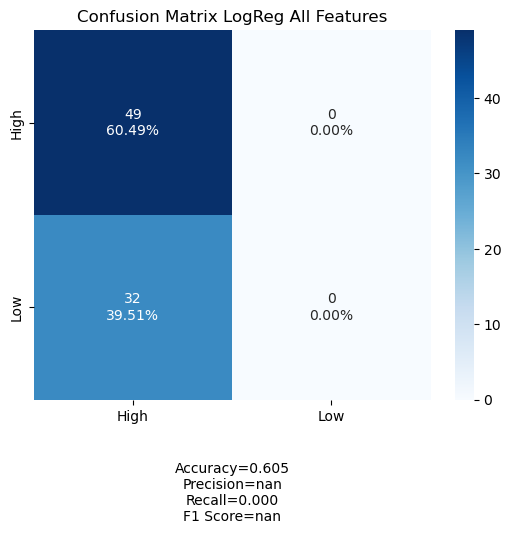

In [43]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["High", 'Low']

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix LogReg All Features",
                     xyplotlabels=False)

In [48]:
X = data[['Area', 'Year', 'Cropland (ha/cap)', 'Efficiency (kt/cropland)', 'Fertilizer N20 Emissions (kt)']]
y = data['CH4_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6049382716049383
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.51      0.61        49
           1       0.50      0.75      0.60        32

    accuracy                           0.60        81
   macro avg       0.63      0.63      0.60        81
weighted avg       0.66      0.60      0.61        81

Confusion Matrix:
 [[25 24]
 [ 8 24]]



The confusion matrix is:
[[25 24]
 [ 8 24]]


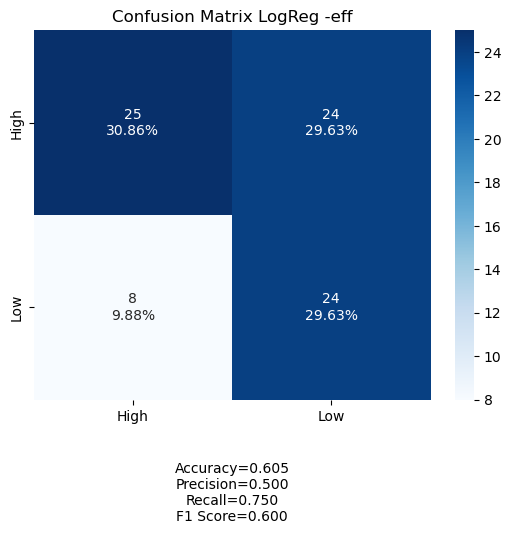

In [50]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["High", 'Low']

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix LogReg -eff",
                     xyplotlabels=False)

In [53]:
X = data[['Area', 'Year']]
y = data['CH4_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71        49
           1       0.57      0.66      0.61        32

    accuracy                           0.67        81
   macro avg       0.66      0.66      0.66        81
weighted avg       0.68      0.67      0.67        81

Confusion Matrix:
 [[33 16]
 [11 21]]



The confusion matrix is:
[[33 16]
 [11 21]]


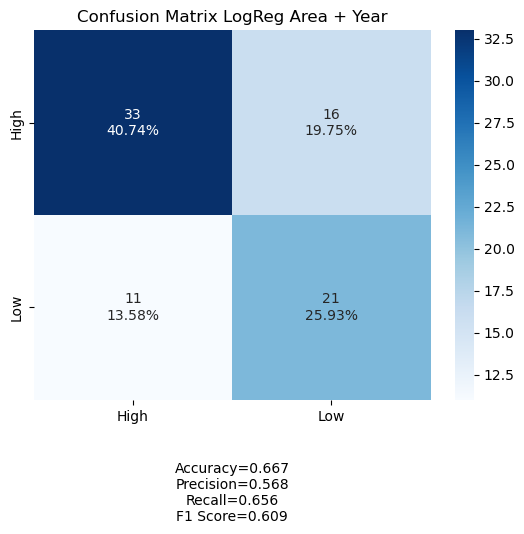

In [55]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["High", 'Low']

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix LogReg Area + Year",
                     xyplotlabels=False)

In [57]:
X = data[['Area']]
y = data['CH4_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71        49
           1       0.57      0.66      0.61        32

    accuracy                           0.67        81
   macro avg       0.66      0.66      0.66        81
weighted avg       0.68      0.67      0.67        81

Confusion Matrix:
 [[33 16]
 [11 21]]



The confusion matrix is:
[[33 16]
 [11 21]]


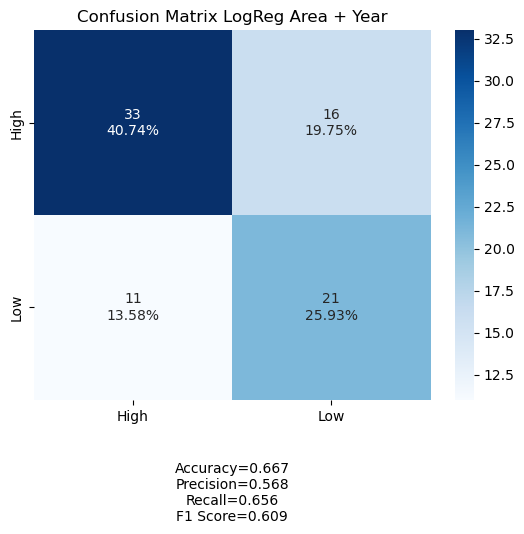

In [55]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["High", 'Low']

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix LogReg Area + Year",
                     xyplotlabels=False)

In [59]:
data = merged.copy()

categorical_features = ['Area', 'Year','Em_label', 'Eff_label', 'CL_label',  "CH4_label"]

# Drop quantitative data columns from the DataFrame
# For example, if your quantitative columns are named 'Raw Cropland', 'Raw N2O Emissions', etc.
quantitative_columns = ['Efficiency (kt/cropland)', 'Cropland (ha/cap)', 'Crop Prod Total (tonnes)', "Fertilizer N20 Emissions (kt)"]  # update with actual column names
data = data[categorical_features]

# Encode categorical features
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # store encoder for each column if you need to reverse-transform
    
data



,Area,Year,Em_label,Eff_label,CL_label,CH4_label
0,0,0,2,2,0,0
1,0,1,2,2,0,0
2,0,2,2,2,0,0
3,0,3,2,2,0,0
4,0,4,0,2,0,0
...,...,...,...,...,...,...
456,12,27,2,2,1,0
457,12,28,2,2,1,0
458,12,29,2,2,1,0
459,12,30,2,2,1,0


In [62]:
# Define features (X) and target (y)
X = data[['Em_label', 'Eff_label', 'CL_label']]
y = data[['CH4_label']]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5867768595041323
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.39      0.53        72
           1       0.49      0.88      0.63        49

    accuracy                           0.59       121
   macro avg       0.66      0.63      0.58       121
weighted avg       0.69      0.59      0.57       121

Confusion Matrix:
 [[28 44]
 [ 6 43]]


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



The confusion matrix is:
[[28 44]
 [ 6 43]]


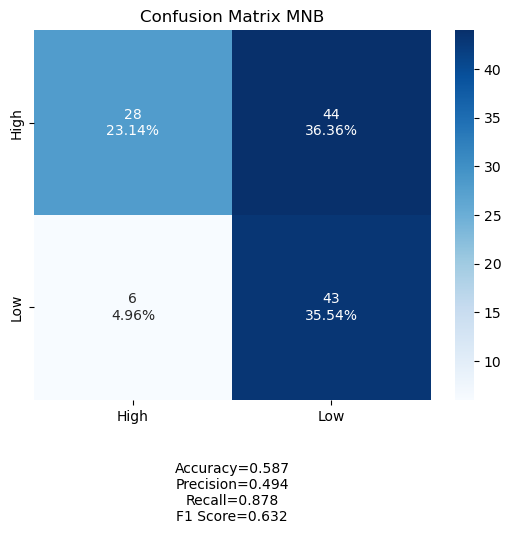

In [64]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["High", 'Low']

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix MNB",
                     xyplotlabels=False)